# Programa Ingenias+ Data Science

Recordemos que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En las clases anteriores, vimos como realizar el analisis exploratorio de los datos, observar el tipo de datos que teniamos, hacernos preguntas y ver algunos patrones. Luego, procesamos y transformamos nuestros datos para luego ajustar modelos de regresión y clasificación.

Llego la hora de utilizar de ver los conceptos de aprendizaje no supervisado para encontrar patrones o grupos de datos.

Utilizaremos nuevamente `scikit-learn` que podes consultar su documentación [aquí](https://scikit-learn.org/stable/).

<font size=5> 🚀 👩🏽‍💻 Machine Learning: Aprendizaje No Supervisado 📣 </font>

#  Paso 1 : Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a trabajar **primero** con el método K-means.

Para empezar, vamos a generarnos una serie de **datasets sintéticos** con las funciones que ya vienen incorporadas en scikit-learn. Notemos que estos datos vienen con un label asociado donde nos indica a que cluster pertenecen.

Vamos a trabajar con datos sinteticos para poder focalizarnos en como funciona el algortimo, en lugar de entender las caracteristicas asociadas a los datos. En un proyecto real, deberiamos explorar los datos y realizar el analisis exploratorio y transformacion de variables que ya realizamos.

¿Por qué es importante hacer una exploración de las variables y obtener estadistica descriptiva?

Para poder aplicar K-means, por ejemplo, deben cumplir ciertos requerimientos:
  
K-means asume que:

- **Forma de los clusters**: La varianza de la distribución es esferica. Lo que significa que los clusters tienen una forma esferica. Lo que significa que si las variables tienen varianzas similares y siguen una distribución normal, es más factible que este supuesto se cumpla.
- **Tamaño de los clusters**: Todos los clusters deben tener el mismo numero (o muy similar) de observaciones
- **Relación entre las variables**: Existe poca o ninguna correlación entre las variables.

In [ ]:
from sklearn.datasets import make_blobs, make_moons # para datos sintéticos

# Paso 2: Crear datasets sintéticos

#### Primer Dataset

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
# n_samples: tamaño de la muestra a crear
# centers = cantidad de centros
# desviación estandard de los clusters: cluster_std
# dimensiones = n_features
# semilla para el generador de números aleatorios =  random_state
# array

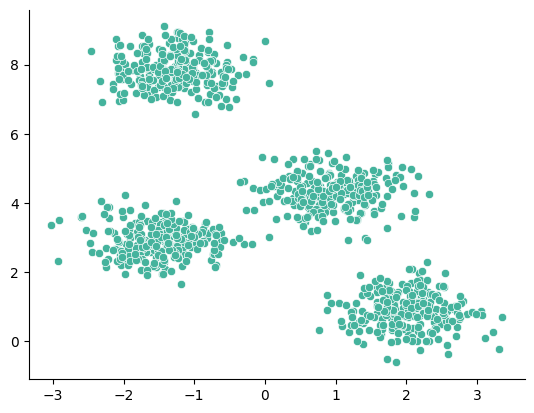

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], color='#45B39D')
sns.despine()
plt.show()

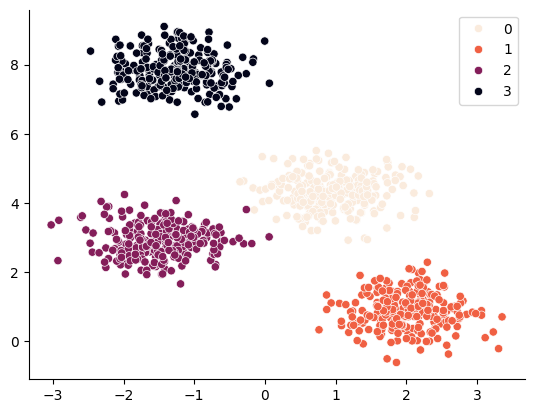

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1, palette='rocket_r')
sns.despine()
plt.show()

#### Segundo Dataset

In [ ]:
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)

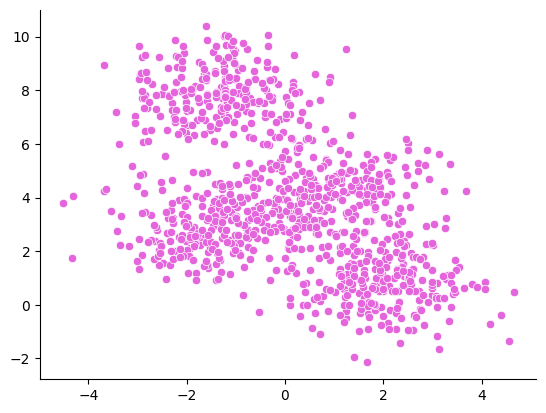

In [ ]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], color='#E565DD')
sns.despine()
plt.show()

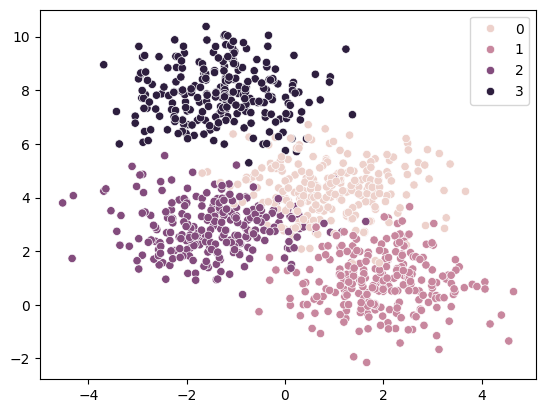

In [ ]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

#### Tercer Dataset

In [ ]:
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

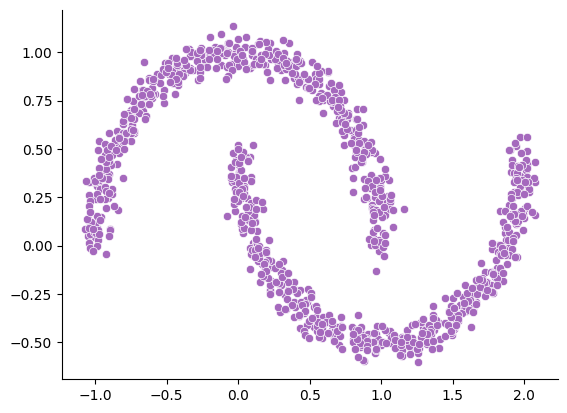

In [ ]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], color='#A569BD')
sns.despine()
plt.show()

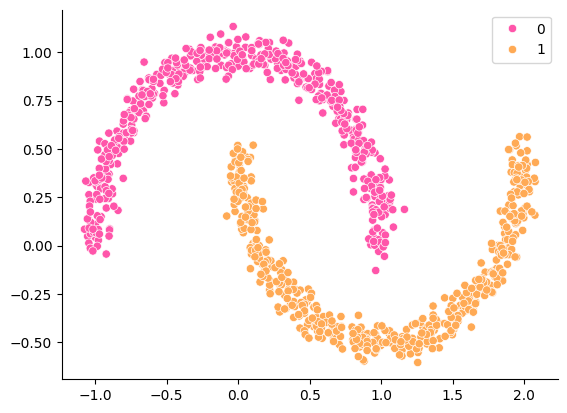

In [ ]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3, palette='spring')
sns.despine()
plt.show()

# K-MEANS

La idea ahora es utilizar el metodo de k-means para poder identificar los clusters sin conocer esta etiqueta.

Como es predecible, scikit-learn tiene una implementación para [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [ ]:
# Importemos la libreria
from sklearn.cluster import KMeans


# Paso 3: Inicialización de modelos K-means

In [ ]:
# Especificamos el numero adecuado de clusters en cada caso
first_kmeans = KMeans(n_clusters=4, random_state=0)
sec_kmeans = KMeans(n_clusters=4, random_state=0)
thr_kmeans = KMeans(n_clusters=2, random_state=0)
# noten la diferencia entre n_clusters de los primeros y el tercero

# Paso 4: Entrenamos los modelos

Entrenamos los modelos con los datos sin pasarles las etiquetas.

In [ ]:
# Entrenamos. A diferencia del aprendizaje supervisado, notarán que ya no le pasamos una etiqueta de salida. Solo los atributos.
# Entrenamos el modelo con los datos de entrenamiento (X1) y sin etiquetas de salida (y1)
first_kmeans.fit(X1)
sec_kmeans.fit(X2)
thr_kmeans.fit(X3)
 # fit(X,y) ///  fit(X_train,y_train) en aprendizaje supervisado - noten la diferencia aqui

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

Se entrena cada modelo K-means con datos específicos (X1, X2, X3). A diferencia del aprendizaje supervisado, K-means no necesita etiquetas de salida, solo los datos de atributos.

# Paso 5: Obtención y visualización de resultados

Luego de entrenar los modelos, podemos consultar el lugar de los centroides y la cantidad de puntos asignados a cada cluster.

In [ ]:
first_centroids = first_kmeans.cluster_centers_ # guardamos las coordenadas (los clusters) obtenidos por kmean
print(first_centroids)
# esto nos permite encontrar los centros de los grupos

[[-1.27283855  7.84651464]
 [ 2.01942692  0.87474842]
 [-1.49807428  2.90164881]
 [ 0.92917513  4.29023124]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-45-85ea75a4c3d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_means_series, palette='vlag')


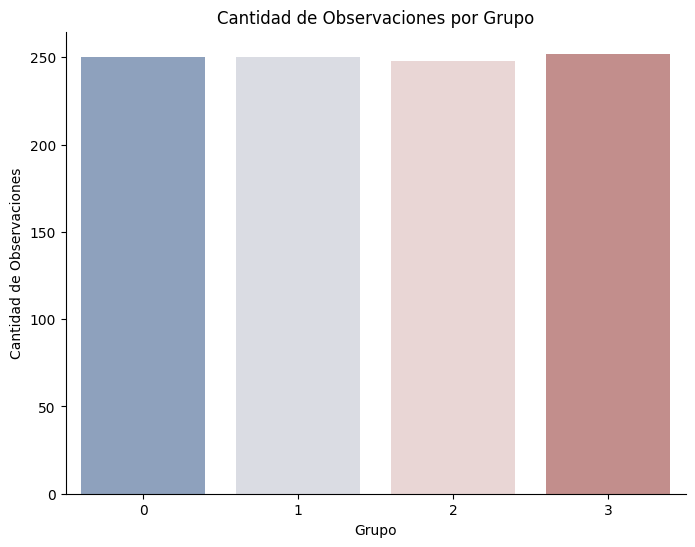

In [ ]:
y_means = first_kmeans.fit_predict(X1)  # fit: ajusta el modelo a los datos (X1) y asigna cada punto al grupo mas cercano
y_means_series = pd.Series(y_means)

# Crear el gráfico de conteo
plt.figure(figsize=(8, 6))
sns.countplot(x=y_means_series, palette='vlag')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.title('Cantidad de Observaciones por Grupo')
sns.despine()  # para quitar los bordes
plt.show()
#clasificamos asi cada punto al grupo al que pertenece
# vemos un gráfico de cuantos puntos hay en cada grupo

In [ ]:
second_centroids = sec_kmeans.cluster_centers_
print(second_centroids)

[[ 0.98303401  4.28004652]
 [-1.30968364  7.85802949]
 [ 1.98933279  0.79090691]
 [-1.51959595  2.88341615]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-47-9490fc4013f2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_means_sec_series, palette='Wistia')


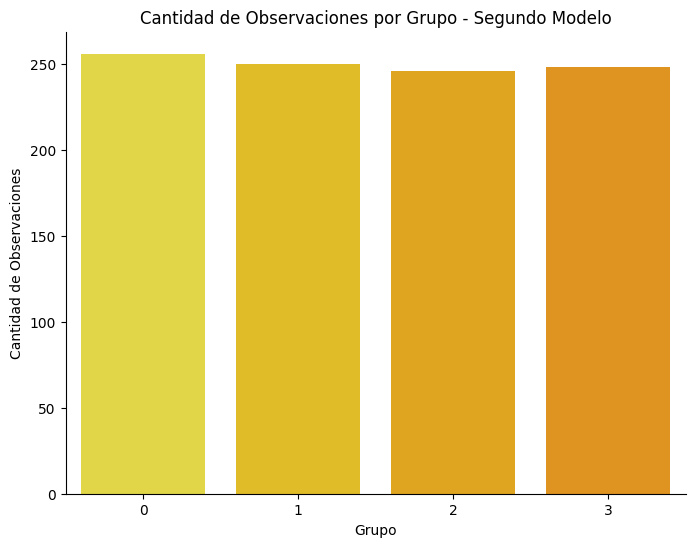

In [ ]:
# Aplicar el modelo al conjunto de datos
y_means_sec = sec_kmeans.fit_predict(X2)

# Convertir y_means_sec a una Serie de pandas
y_means_sec_series = pd.Series(y_means_sec)

# Graficar la cantidad de observaciones en cada grupo
plt.figure(figsize=(8, 6))
sns.countplot(x=y_means_sec_series, palette='Wistia')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.title('Cantidad de Observaciones por Grupo - Segundo Modelo')
sns.despine()
plt.show()

In [ ]:
third_centroids = thr_kmeans.cluster_centers_
print(third_centroids)

[[ 1.20182828 -0.07742956]
 [-0.20060669  0.57617118]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-49-694104cac4a7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_means_thr_series, palette='summer')


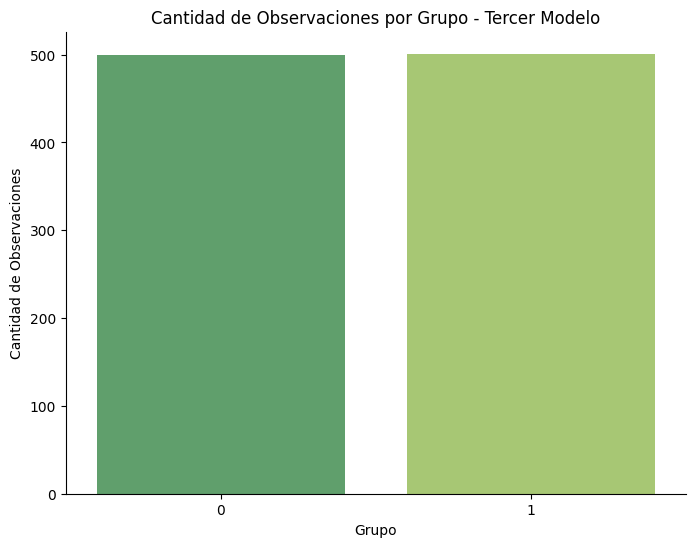

In [ ]:
# Aplicar el modelo al conjunto de datos
y_means_thr = thr_kmeans.fit_predict(X3)

# Convertir y_means_thr a una Serie de pandas
y_means_thr_series = pd.Series(y_means_thr)

# Graficar la cantidad de observaciones en cada grupo
plt.figure(figsize=(8, 6))
sns.countplot(x=y_means_thr_series, palette='summer')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.title('Cantidad de Observaciones por Grupo - Tercer Modelo')
sns.despine()
plt.show()

También podemos plotear los centros y las etiquetas en un grafico.

In [ ]:
etiquetas_1 = first_kmeans.labels_
etiquetas_2 = sec_kmeans.labels_
etiquetas_3 = thr_kmeans.labels_

# Paso 6: visualización 2d

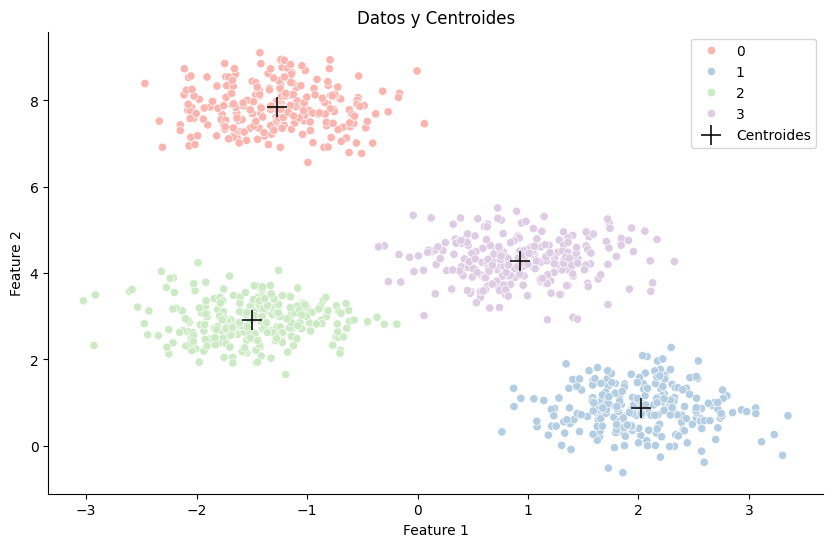

In [ ]:
# Graficando los datos y centroides en 2D
plt.figure(figsize=(10, 6))

# Graficar los puntos de datos
sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue=etiquetas_1, palette='Pastel1', legend='full', marker='o')

# Graficar los centroides
sns.scatterplot(x=first_centroids[:, 0], y=first_centroids[:, 1], color='black', marker="+", s=200, label='Centroides')

# Configurar el título y etiquetas
plt.title('Datos y Centroides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Añadir la leyenda
plt.legend()

# Ajustar el gráfico
sns.despine()

# Mostrar el gráfico
plt.show()

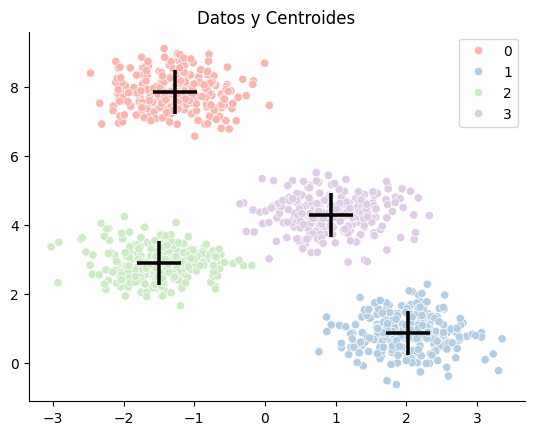

In [ ]:
# Graficando los datos y centroides en 2D
sns.scatterplot(x=X1[:, 0], y=X1[:, -1], hue=etiquetas_1, palette='Pastel1')
sns.scatterplot(x=first_centroids[:, 0], y=first_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

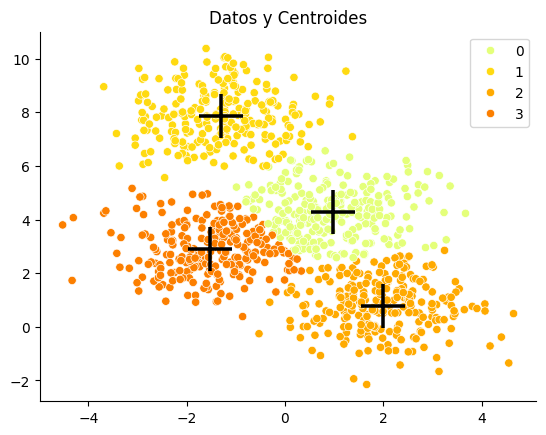

In [ ]:
# Graficando los datos y centroides en 2D
sns.scatterplot(x=X2[:, 0], y=X2[:, -1], hue=etiquetas_2, palette='Wistia')
sns.scatterplot(x=second_centroids[:, 0], y=second_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

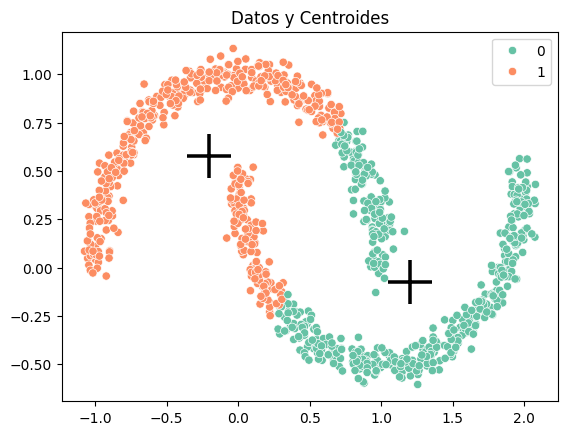

In [ ]:
# Graficando los datos y centroides en 2D
sns.scatterplot(x=X3[:, 0], y=X3[:, -1], hue=etiquetas_3, palette='Set2')
sns.scatterplot(x=third_centroids[:, 0], y=third_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
plt.show()

# Resumen

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


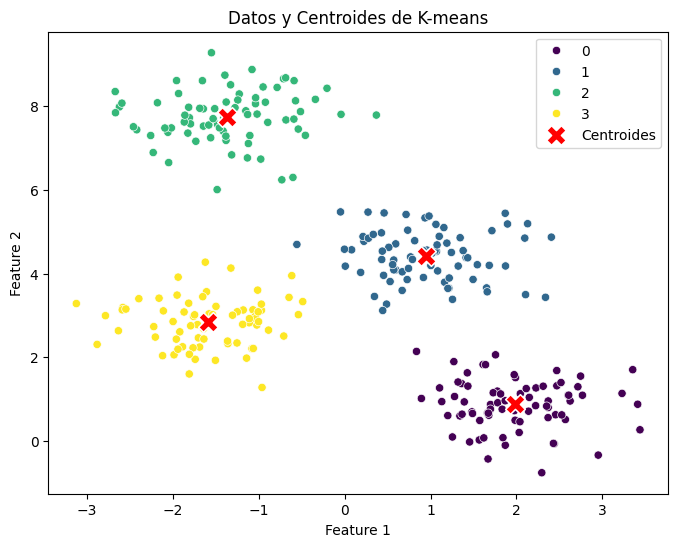

In [ ]:
# Importar librerías necesarias
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.datasets import make_blobs

# Configuración de datos sintéticos - en este caso usamos sintéticos
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Crear el modelo K-means con 4 clusters - es posible probar otros
kmeans = KMeans(n_clusters=4, random_state=0)

# Ajustar el modelo a los datos - diferente a aprendizaje supervisado
kmeans.fit(X)

# Obtener los centroides y las etiquetas de los clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizar los datos y centroides
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', marker='o')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroides')
plt.title('Datos y Centroides de K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



# Ejemplo:
Usamos datos de iris

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


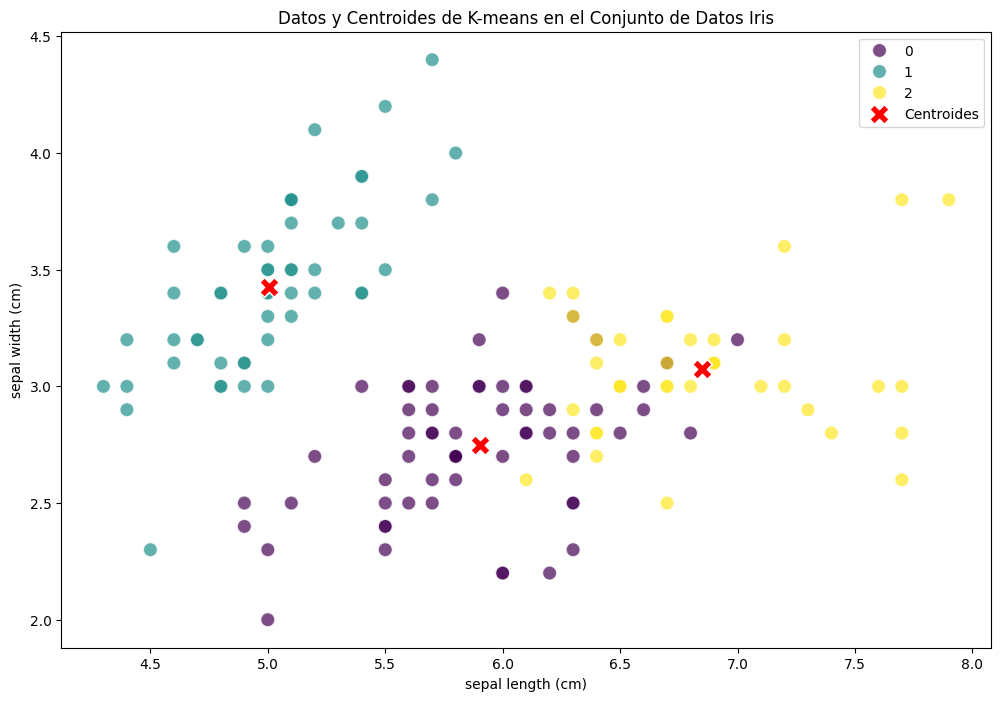

In [ ]:
from sklearn.datasets import load_iris
# Cargargamos el conjunto de datos de iris
iris = load_iris()
X = iris.data
# X contiene las medidas de longitud y ancho de sépalos y pétalos de las flores
y = iris.target # noten que esto no lo usaremos
# pero se incluyen en el dataset para comparar los clusters encontrados por el algoritmo
# con las verdaderas categorías de las flores
feature_names = iris.feature_names
# y: en este contexto es analizar la precisión del clustering

# Crear el modelo K-means con 3 clusters (porque hay 3 especies de iris en el dataset)
kmeans = KMeans(n_clusters=3, random_state=0) # pueden probar con otros números

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener los centroides y las etiquetas de los clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Convertir los datos a un DataFrame para la visualización - dependerá de la visualización a realizar
df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = labels

# Visualizar los datos y centroides
plt.figure(figsize=(12, 8))

# Graficar los datos
sns.scatterplot(x=df[feature_names[0]], y=df[feature_names[1]], hue=df['Cluster'], palette='viridis', marker='o', s=100, alpha=0.7, legend='full')

# Graficar los centroides
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroides')

# Configurar la visualización
plt.title('Datos y Centroides de K-means en el Conjunto de Datos Iris')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

In [ ]:
# Podemos usar una matriz de confusion
# creamos la matriz de confusión
conf_matrix = confusion_matrix(y, labels)

# Imprimimos
print("Matriz de Confusión:")
print(conf_matrix)

# Opcional: mostrar la matriz de confusión con etiquetas para mejor interpretación
class_names = iris.target_names
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
print("\nMatriz de Confusión con Etiquetas:")
print(conf_matrix_df)

Matriz de Confusión:
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]

Matriz de Confusión con Etiquetas:
            setosa  versicolor  virginica
setosa           0          50          0
versicolor      48           0          2
virginica       14           0         36


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


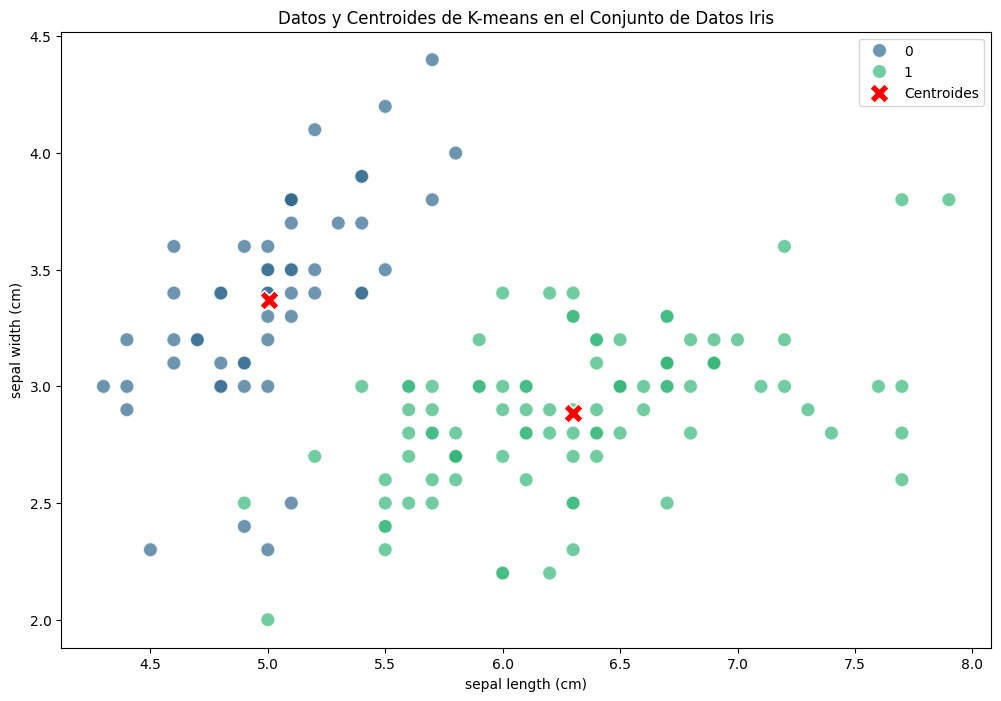

In [ ]:
iris = load_iris()
X = iris.data  # Datos de entrada (sin etiquetas)
feature_names = iris.feature_names

kmeans = KMeans(n_clusters=2, random_state=0) # cambiamos
kmeans.fit(X) # ajustamos
centroids = kmeans.cluster_centers_ # centroides
labels = kmeans.labels_

df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = labels

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[feature_names[0]], y=df[feature_names[1]], hue=df['Cluster'], palette='viridis', marker='o', s=100, alpha=0.7, legend='full')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroides')
plt.title('Datos y Centroides de K-means en el Conjunto de Datos Iris')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()


In [ ]:
conf_matrix = confusion_matrix(y, labels)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Opcional: Mostrar la matriz de confusión con etiquetas para mejor interpretación
class_names = iris.target_names
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
print("\nMatriz de Confusión con Etiquetas:")
print(conf_matrix_df)

Matriz de Confusión:
[[50  0  0]
 [ 3 47  0]
 [ 0 50  0]]

Matriz de Confusión con Etiquetas:
            setosa  versicolor  virginica
setosa          50           0          0
versicolor       3          47          0
virginica        0          50          0


Alternativa a la matriz de confusión

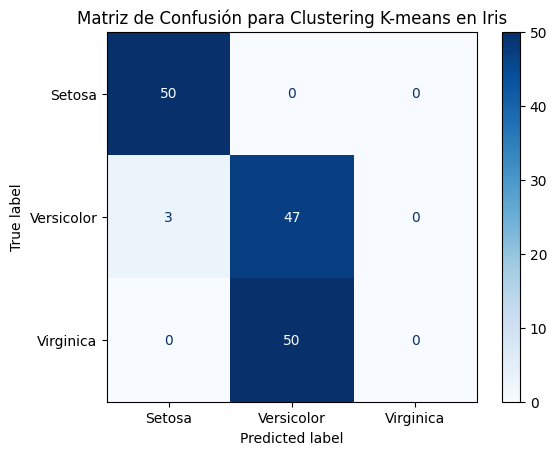

In [ ]:
# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión para Clustering K-means en Iris')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


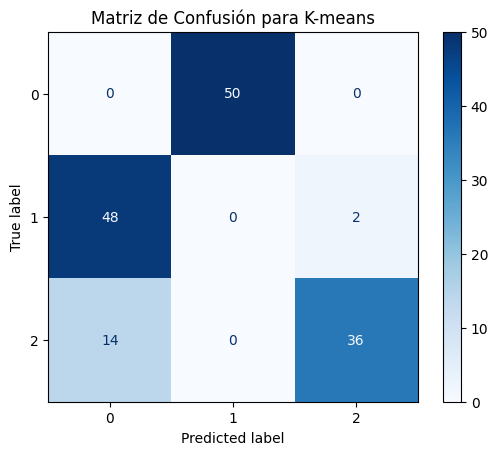

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
iris = load_iris()
X = iris.data  # Datos de entrada (sin etiquetas)
y_true = iris.target  # Etiquetas verdaderas

# Crear el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels_pred = kmeans.labels_
# Crear un DataFrame para las etiquetas predichas y verdaderas
df = pd.DataFrame({'Etiqueta Verdadera': y_true, 'Cluster Predicho': labels_pred})

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_true, labels_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=range(3))
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión para K-means')
plt.show()

EJEMPLO DE ANÁLISIS:

- Cluster 0: Contiene principalmente instancias de Versicolor (48) y algunas de Virginica (14), pero no contiene instancias de Setosa.
- Cluster 1: Contiene principalmente instancias de Setosa (50) y ninguna de Versicolor o Virginica.
- Cluster 2: Contiene principalmente instancias de Virginica (36) y algunas de Versicolor (2), pero ninguna de Setosa.



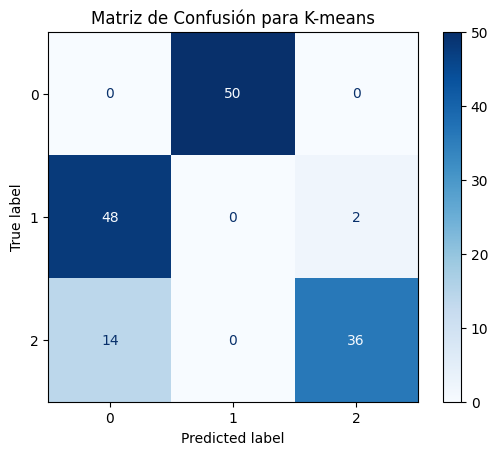

**En este [link](https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/) podrán acceder a otro ejemplo de implementación de K-means.** Asimismo, este [artículo](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) de Towards Data Science les puede ser de utilidad.